# Predicting heart disease using Machine Learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine Learning Model capable of predicting whether or not someone has a heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statement,
> Given clinical parameters about a patient, Can we predict whether or not they have heart disease?

## 2. Data
The original data came from the UCI machine learning repository

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib and numpy for data analysis and manipulation.

In [30]:
# Import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Because we need our plots to appear inside the notebooks
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [3]:
df = pd.read_csv('heart-disease.csv')
df.shape # (Row, Col)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset we're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have  and how do we treat different types?
3. What's missing from the data how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Let's find out about how many of each class there are?
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

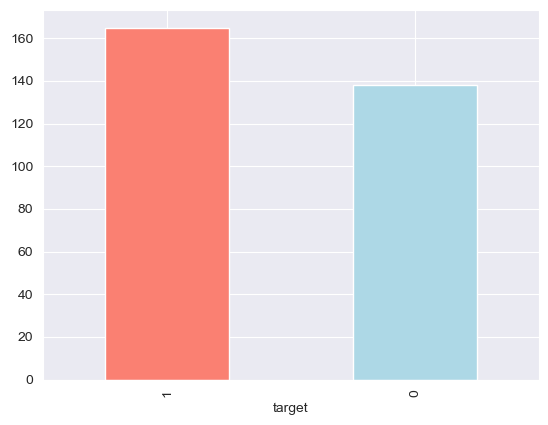

In [7]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


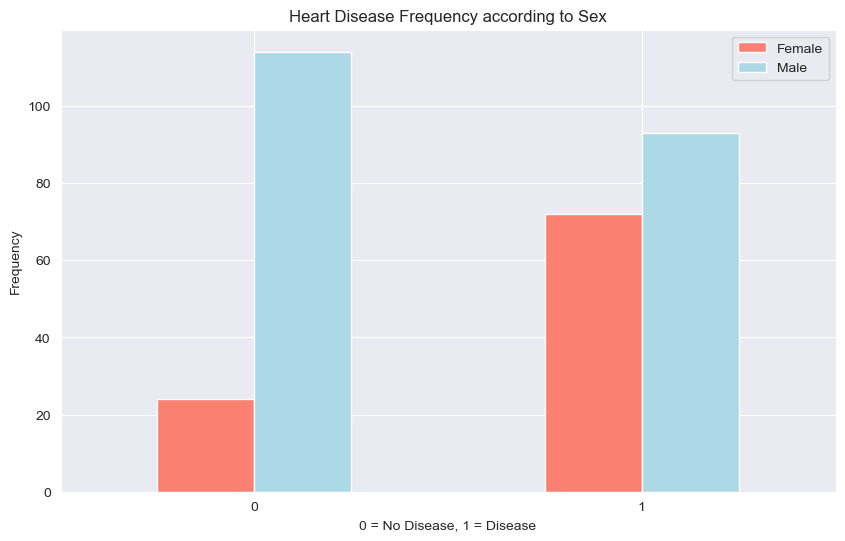

In [13]:
# Create a plot of Crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize= (10, 6), color=['salmon', 'lightblue']);
plt.title("Heart Disease Frequency according to Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease

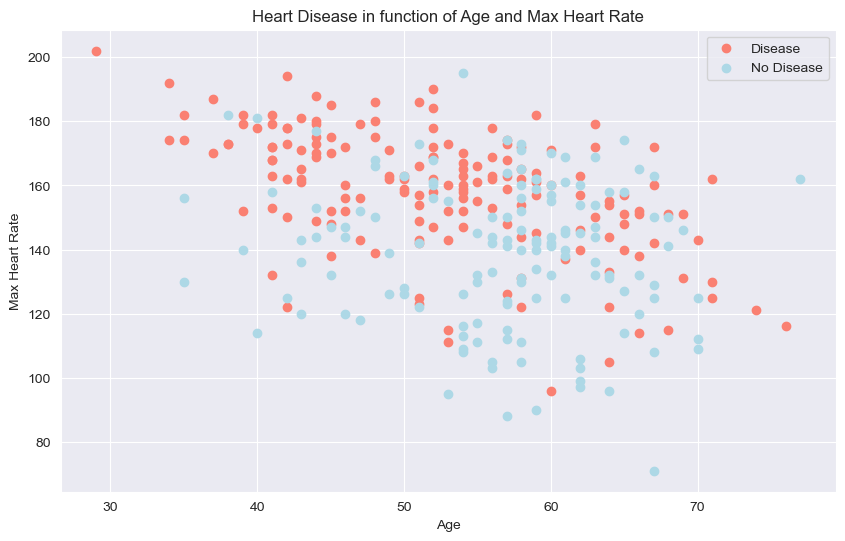

In [14]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            color='salmon');

# Scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            color='lightblue');

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

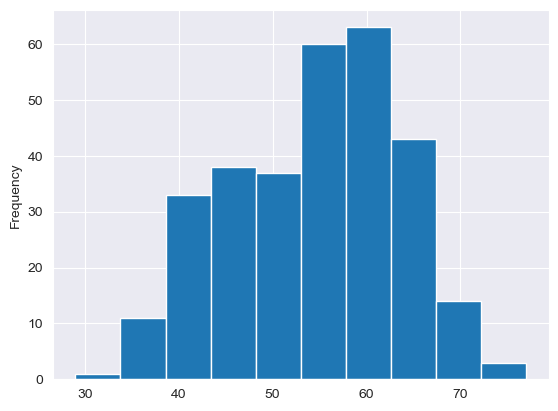

In [15]:
# Check the distribution of the age column with the histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Types

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


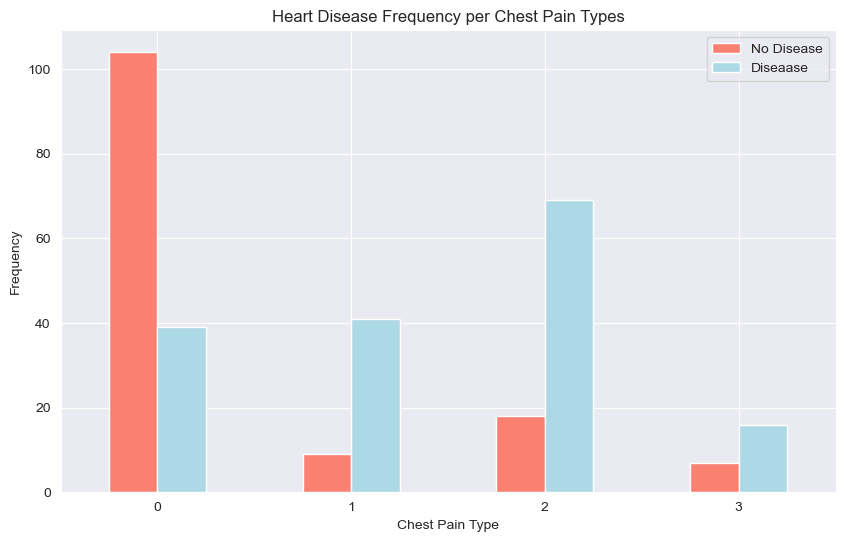

In [17]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue']);

# Add some helpful info
plt.title("Heart Disease Frequency per Chest Pain Types")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Diseaase"]);
plt.xticks(rotation=0);

In [18]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


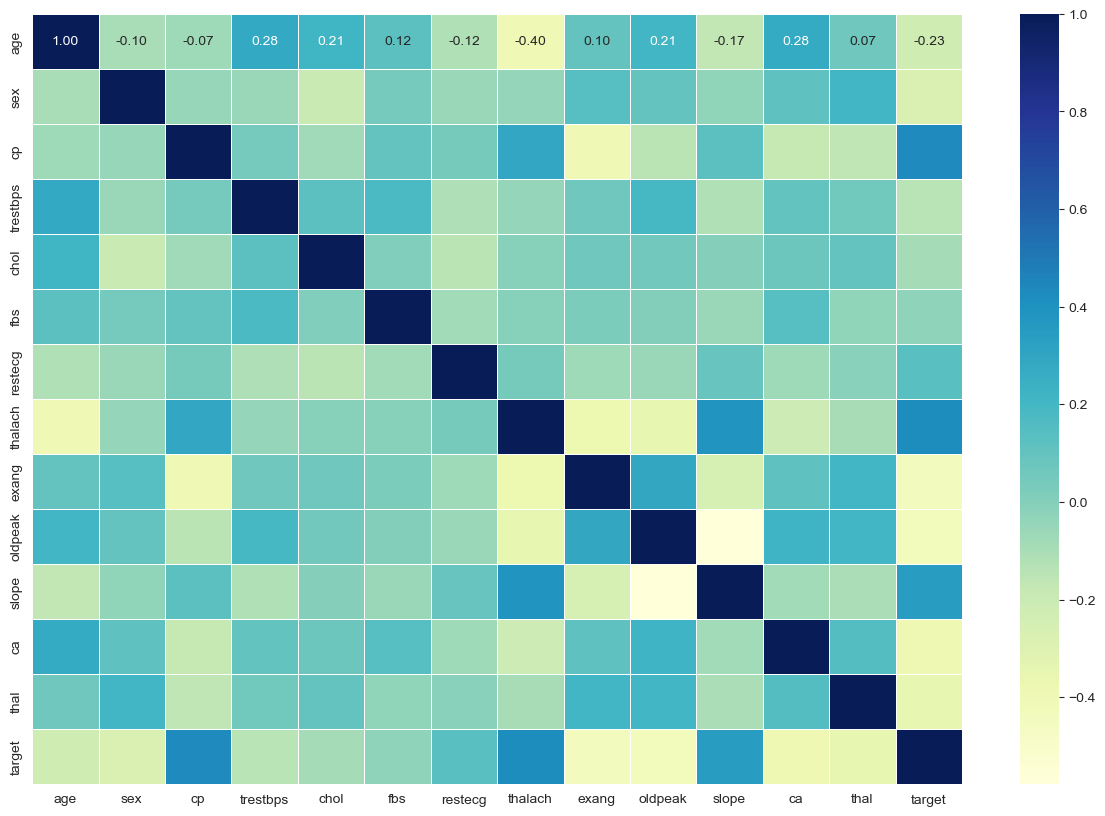

In [19]:
# Lets make the correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");


In [21]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [24]:
# Split the Data into X and y
X = df.drop("target", axis=1)
y = df["target"]

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [25]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we've got our data split into training set and test sets, it's time to build a machine learning model.
We'll train it (find the patterns) on the training set.
And we'll test it (use the patterns) on the test set.

We're going to try 7 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier
4. Support Vector Machine (SVM)
5. Decision Tree Classifier
6. Gaussian Naive Bayes
7. Gradient Boosting Classifier



In [33]:
# Put models in dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and Evaluates different Machine Learning Models
    models : a dictionary of different Scikit-Learn Machine Learning models
    X_train : training data (no labels)
    X_test : test data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set Random Seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models

    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and appends its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [34]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'Support Vector Machine': 0.7049180327868853,
 'Decision Tree': 0.8360655737704918,
 'Gaussian Naive Bayes': 0.8688524590163934,
 'Gradient Boosting': 0.7704918032786885}

## Model Comparison

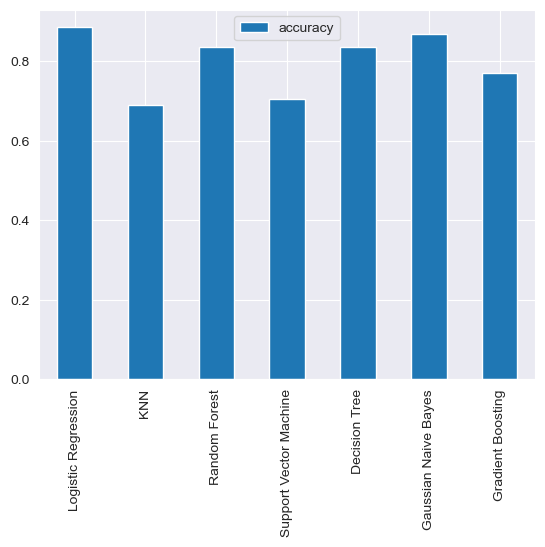

In [37]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [39]:
# Let's tune KNN

train_scores, test_scores = [], []

# Create a list of different values of n_neighbors
neighbors = range(1, 21)

# Set KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the model
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [40]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [42]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum Test Score: 75.41%


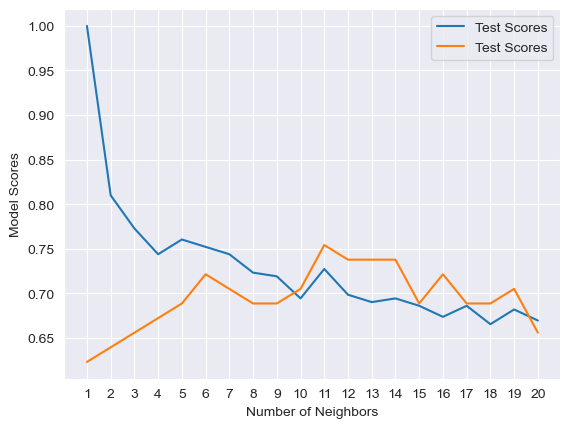

In [45]:
plt.plot(neighbors, train_scores, label="Test Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Scores")
plt.legend()

print(f"Maximum Test Score: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [60]:
# Define hyperparameter grids for all models
param_grids = {
    "Logistic Regression": {
        "C": np.logspace(-4, 4, 20),
        "solver": ["liblinear"]
    },
    "KNN": {
        "n_neighbors": np.arange(1, 50, 2)
    },
    "Random Forest": {
        "n_estimators": np.arange(10, 1000, 50),
        "max_depth": [None, 3, 5, 10],
        "min_samples_split": np.arange(2, 20, 2),
        "min_samples_leaf": np.arange(1, 20, 2)
    },
    "Support Vector Machine": {
        "C": np.logspace(-4, 4, 20),
        "kernel": ["linear", "rbf"]
    },
    "Decision Tree": {
        "max_depth": [None, 3, 5, 10],
        "min_samples_split": np.arange(2, 20, 2),
        "min_samples_leaf": np.arange(1, 20, 2)
    },
    "Gaussian Naive Bayes": {
        "var_smoothing": np.logspace(-9, 0, 20)
    },
    "Gradient Boosting": {
        "n_estimators": np.arange(10, 500, 50),
        "learning_rate": np.logspace(-3, 0, 10),
        "max_depth": [3, 5, 10]
    }
}


Now we've got our hyperparameters grids setup for each of our models,
let's tune them using RandomizedSearchCV...

In [59]:
# Perform hyperparameter tuning for all models
random_search_results = {}

for name, model in models.items():
    if name in param_grids:  # Ensure model has hyperparameters to tune
        print(f"Tuning {name}...")

        # Perform RandomizedSearchCV
        rs = RandomizedSearchCV(model, param_distributions=param_grids[name],
                                cv=5, n_iter=20, verbose=True, n_jobs=-1)

        rs.fit(X_train, y_train)

        # Store the RandomizedSearchCV object for further use
        random_search_results[name] = rs


Tuning Logistic Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tuning KNN...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tuning Support Vector Machine...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tuning Decision Tree...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tuning Gaussian Naive Bayes...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tuning Gradient Boosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [61]:
# Extract best parameters for each model
best_params = {name: rs.best_params_ for name, rs in random_search_results.items()}
best_params

{'Logistic Regression': {'solver': 'liblinear', 'C': 0.23357214690901212},
 'KNN': {'n_neighbors': 3},
 'Random Forest': {'n_estimators': 460,
  'min_samples_split': 14,
  'min_samples_leaf': 11,
  'max_depth': 10},
 'Support Vector Machine': {'kernel': 'linear', 'C': 11.288378916846883},
 'Decision Tree': {'min_samples_split': 4,
  'min_samples_leaf': 9,
  'max_depth': 10},
 'Gaussian Naive Bayes': {'var_smoothing': 1.8329807108324338e-05},
 'Gradient Boosting': {'n_estimators': 360,
  'max_depth': 3,
  'learning_rate': 0.021544346900318832}}

In [62]:
# Extract best scores on the test set
best_scores = {name: rs.score(X_test, y_test) for name, rs in random_search_results.items()}
best_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8688524590163934,
 'Support Vector Machine': 0.8852459016393442,
 'Decision Tree': 0.8524590163934426,
 'Gaussian Naive Bayes': 0.8688524590163934,
 'Gradient Boosting': 0.8032786885245902}

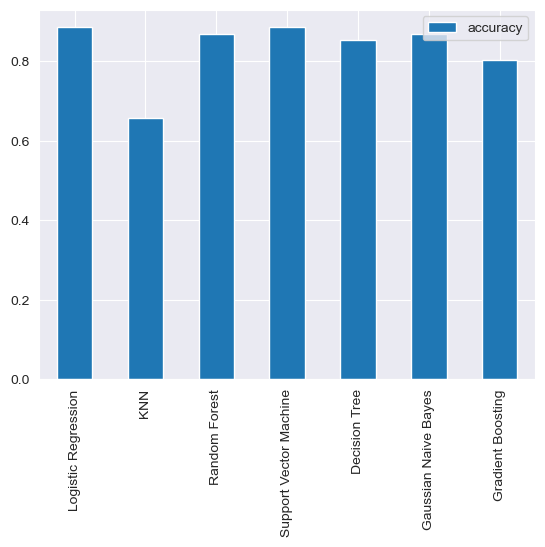

In [67]:
# Convert best_scores dictionary to a DataFrame
model_compare = pd.DataFrame(best_scores, index=["accuracy"])

# Plot the bar graph
model_compare.T.plot.bar();

## Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [71]:
# Defind Hyperparameters grid for all models
grid_param_grids = {
    "Logistic Regression": {
        "C": np.logspace(-4, 4, 10),
        "solver": ["liblinear"]
    },
    "KNN": {
        "n_neighbors": np.arange(1, 30, 2)
    },
    "Random Forest": {
        "n_estimators": np.arange(50, 500, 100),
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 5, 10]
    },
    "Support Vector Machine": {
        "C": np.logspace(-3, 3, 10),
        "kernel": ["linear", "rbf"]
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 5, 10]
    },
    "Gaussian Naive Bayes": {
        "var_smoothing": np.logspace(-9, -3, 10)
    },
    "Gradient Boosting": {
        "n_estimators": np.arange(50, 300, 50),
        "learning_rate": np.logspace(-2, 0, 5),
        "max_depth": [3, 5]
    }
}

In [72]:
# Perform hyperparameter tuning for all models
grid_search_results = {}

for name, model in models.items():
    if name in grid_param_grids:  # Ensure model has hyperparameters to tune
        print(f"Tuning {name} with GridSearchCV...")

        # Perform GridSearchCV
        gs = GridSearchCV(model, param_grid=grid_param_grids[name],
                          cv=5, verbose=True, n_jobs=-1)

        gs.fit(X_train, y_train)

        # Store the GridSearchCV object for further use
        grid_search_results[name] = gs

Tuning Logistic Regression with GridSearchCV...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning KNN with GridSearchCV...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Tuning Random Forest with GridSearchCV...
Fitting 5 folds for each of 135 candidates, totalling 675 fits
Tuning Support Vector Machine with GridSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tuning Decision Tree with GridSearchCV...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Tuning Gaussian Naive Bayes with GridSearchCV...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning Gradient Boosting with GridSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [73]:
# Extract best parameters for each model
best_grid_params = {name: gs.best_params_ for name, gs in grid_search_results.items()}
best_grid_params

{'Logistic Regression': {'C': 0.3593813663804626, 'solver': 'liblinear'},
 'KNN': {'n_neighbors': 3},
 'Random Forest': {'max_depth': None,
  'min_samples_leaf': 5,
  'min_samples_split': 10,
  'n_estimators': 350},
 'Support Vector Machine': {'C': 2.154434690031882, 'kernel': 'linear'},
 'Decision Tree': {'max_depth': None,
  'min_samples_leaf': 5,
  'min_samples_split': 5},
 'Gaussian Naive Bayes': {'var_smoothing': 1e-05},
 'Gradient Boosting': {'learning_rate': 1.0,
  'max_depth': 5,
  'n_estimators': 150}}

In [74]:
# Extract best scores on the test set
best_grid_scores = {name: gs.score(X_test, y_test) for name, gs in grid_search_results.items()}
best_grid_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8688524590163934,
 'Support Vector Machine': 0.8852459016393442,
 'Decision Tree': 0.7868852459016393,
 'Gaussian Naive Bayes': 0.8688524590163934,
 'Gradient Boosting': 0.819672131147541}

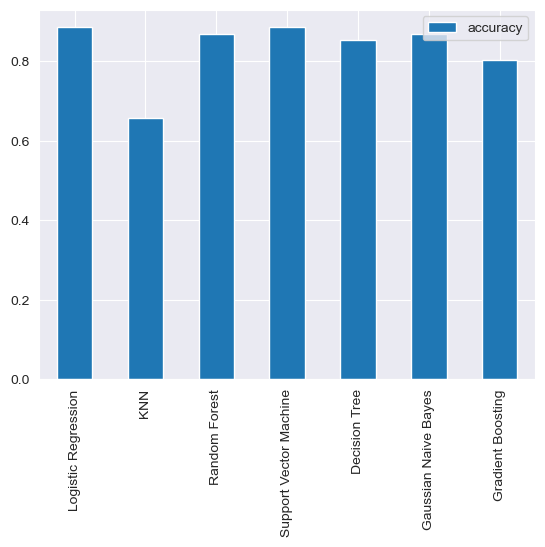

In [75]:
# Convert best_scores dictionary to a DataFrame
model_compare = pd.DataFrame(best_scores, index=["accuracy"])

# Plot the bar graph
model_compare.T.plot.bar();

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [77]:
# Make prediction with tuned models
y_preds = {}

for name, model in grid_search_results.items():
    y_preds[name] = model.predict(X_test)


In [78]:
y_preds

{'Logistic Regression': array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 'KNN': array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64),
 'Random Forest': array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 'Support Vector Machine': array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 'Decision Tree': array([0, 0, 0, 0, 1,

In [79]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

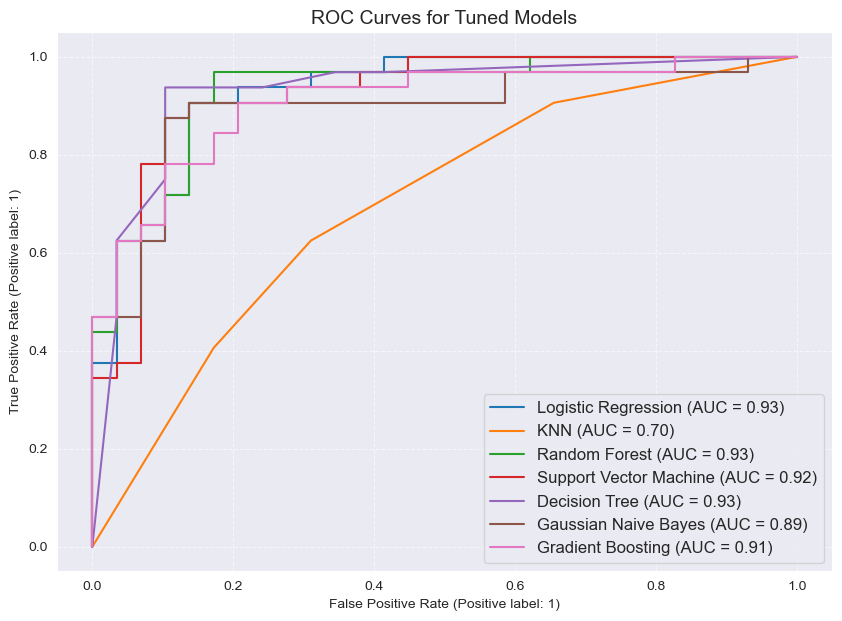

In [86]:
# Set figure size and style
plt.figure(figsize=(10, 7))
plt.title("ROC Curves for Tuned Models", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Plot ROC Curves for all models
for name, model in grid_search_results.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())

# Improve legend placement
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [85]:
for name, preds in y_preds.items():
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, preds))
    print("\n")


Confusion Matrix for Logistic Regression:
[[25  4]
 [ 3 29]]


Confusion Matrix for KNN:
[[20  9]
 [12 20]]


Confusion Matrix for Random Forest:
[[24  5]
 [ 3 29]]


Confusion Matrix for Support Vector Machine:
[[26  3]
 [ 4 28]]


Confusion Matrix for Decision Tree:
[[28  1]
 [12 20]]


Confusion Matrix for Gaussian Naive Bayes:
[[26  3]
 [ 5 27]]


Confusion Matrix for Gradient Boosting:
[[23  6]
 [ 5 27]]




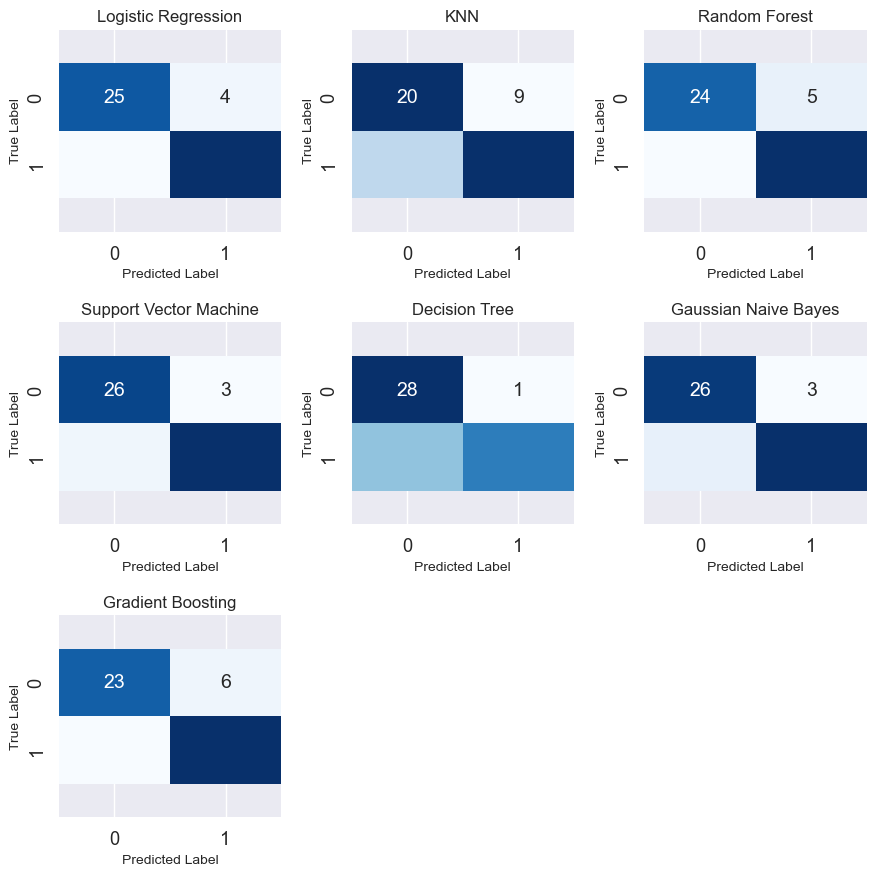

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

sns.set(font_scale=1.2)

def plot_conf_matrices(y_test, y_preds):
    """
    Plots confusion matrices for all models in a grid layout.
    """
    num_models = len(y_preds)
    cols = 3
    rows = int(np.ceil(num_models / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for i, (name, preds) in enumerate(y_preds.items()):
        ax = axes[i]
        cm = confusion_matrix(y_test, preds)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14}, ax=ax)
        ax.set_title(name, fontsize=12)
        ax.set_xlabel("Predicted Label", fontsize=10)
        ax.set_ylabel("True Label", fontsize=10)

        # Adjust heatmap cell boundaries
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)

    # Hide any unused subplots if models < grid size
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call function to plot confusion matrices for all models
plot_conf_matrices(y_test, y_preds)


Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.  

In [91]:
for name, preds in y_preds.items():
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, preds))
    print("="*60)


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.62      0.69      0.66        29
           1       0.69      0.62      0.66        32

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      0.66      0.66        61


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   

 ### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [92]:
# Dictionary to store cross-validation results
cv_results = {}

# Iterate over all trained models
for name, model in models.items():
    print(f"Cross-validating {name}...")

    # Compute cross-validated scores
    cv_acc = cross_val_score(model, X, y, cv=5, scoring="accuracy").mean()
    cv_precision = cross_val_score(model, X, y, cv=5, scoring="precision").mean()
    cv_recall = cross_val_score(model, X, y, cv=5, scoring="recall").mean()
    cv_f1 = cross_val_score(model, X, y, cv=5, scoring="f1").mean()

    # Store results
    cv_results[name] = {
        "Accuracy": cv_acc,
        "Precision": cv_precision,
        "Recall": cv_recall,
        "F1": cv_f1
    }

Cross-validating Logistic Regression...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-validating KNN...
Cross-validating Random Forest...
Cross-validating Support Vector Machine...
Cross-validating Decision Tree...
Cross-validating Gaussian Naive Bayes...
Cross-validating Gradient Boosting...


In [93]:
# Convert results dictionary to DataFrame
cv_metrics_df = pd.DataFrame(cv_results).T  # Transpose for readability

# Display the DataFrame
cv_metrics_df

,Accuracy,Precision,Recall,F1
Logistic Regression,0.824863,0.819842,0.878788,0.846641
KNN,0.643880,0.658901,0.721212,0.688392
Random Forest,0.821530,0.835285,0.860606,0.840220
Support Vector Machine,0.643497,0.634121,0.836364,0.719969
Decision Tree,0.755519,0.791944,0.793939,0.776016
Gaussian Naive Bayes,0.805082,0.815736,0.836364,0.824598
Gradient Boosting,0.808306,0.809485,0.854545,0.827414


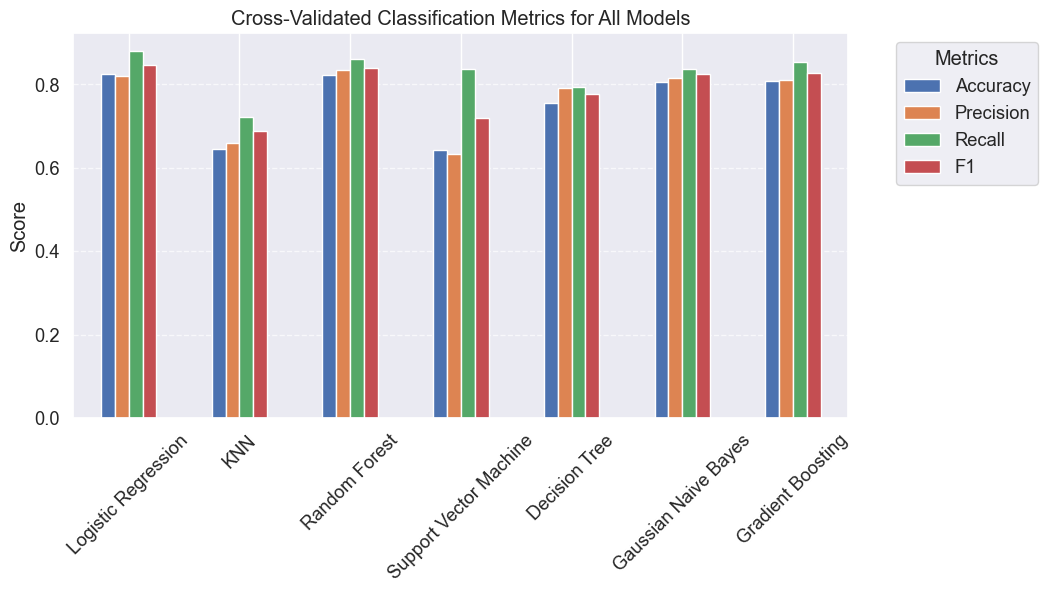

In [94]:
# Plot a grouped bar chart of metrics
cv_metrics_df.plot(kind="bar", figsize=(10, 5))
plt.title("Cross-Validated Classification Metrics for All Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our models...

In [95]:
# Dictionary to store fitted models
fitted_models = {}

# Fit each model using its best parameters from GridSearchCV or RandomizedSearchCV
for name, model in grid_search_results.items():
    print(f"Fitting {name} with best parameters...")

    # Refit model on full training data
    model.best_estimator_.fit(X_train, y_train)

    # Store fitted model
    fitted_models[name] = model.best_estimator_

Fitting Logistic Regression with best parameters...
Fitting KNN with best parameters...
Fitting Random Forest with best parameters...
Fitting Support Vector Machine with best parameters...
Fitting Decision Tree with best parameters...
Fitting Gaussian Naive Bayes with best parameters...
Fitting Gradient Boosting with best parameters...


In [103]:
# Dictionary to store feature importance
feature_importance = {}

# Iterate over fitted models
for name, model in fitted_models.items():
    if hasattr(model, "coef_"):  # For models with coefficients (e.g., Logistic Regression, SVM)
        feature_importance[name] = model.coef_[0]
    elif hasattr(model, "feature_importances_"):  # For tree-based models (Random Forest, Gradient Boosting)
        feature_importance[name] = model.feature_importances_

# Filter out models without feature importance
valid_feature_importance = {k: v for k, v in feature_importance.items() if len(v) > 0}

In [104]:
# Dictionary to store DataFrames for each model
feature_dfs = {}

for name, values in valid_feature_importance.items():
    feature_names = X_train.columns[:len(values)]  # Ensure correct indexing
    feature_dfs[name] = pd.DataFrame(values, index=feature_names, columns=[name])

# Merge all feature importance DataFrames
feature_df = pd.concat(feature_dfs.values(), axis=1)
feature_df

,Logistic Regression,Random Forest,Support Vector Machine,Decision Tree,Gradient Boosting
age,0.005129,0.067385,0.007755,0.085004,0.110568
sex,-1.047838,0.040332,-1.039954,0.050329,0.025510
cp,0.717219,0.134550,0.619590,0.320291,0.234801
trestbps,-0.011799,0.038088,-0.017839,0.017502,0.058948
chol,-0.001860,0.039460,-0.001949,0.054922,0.105006
fbs,0.067412,0.001702,0.434090,0.000000,0.006801
restecg,0.401003,0.009341,0.223734,0.000000,0.016627
thalach,0.025197,0.097403,0.013275,0.037011,0.043909
exang,-0.716624,0.096715,-0.589198,0.107238,0.078438
oldpeak,-0.593994,0.135045,-0.499920,0.131382,0.127996


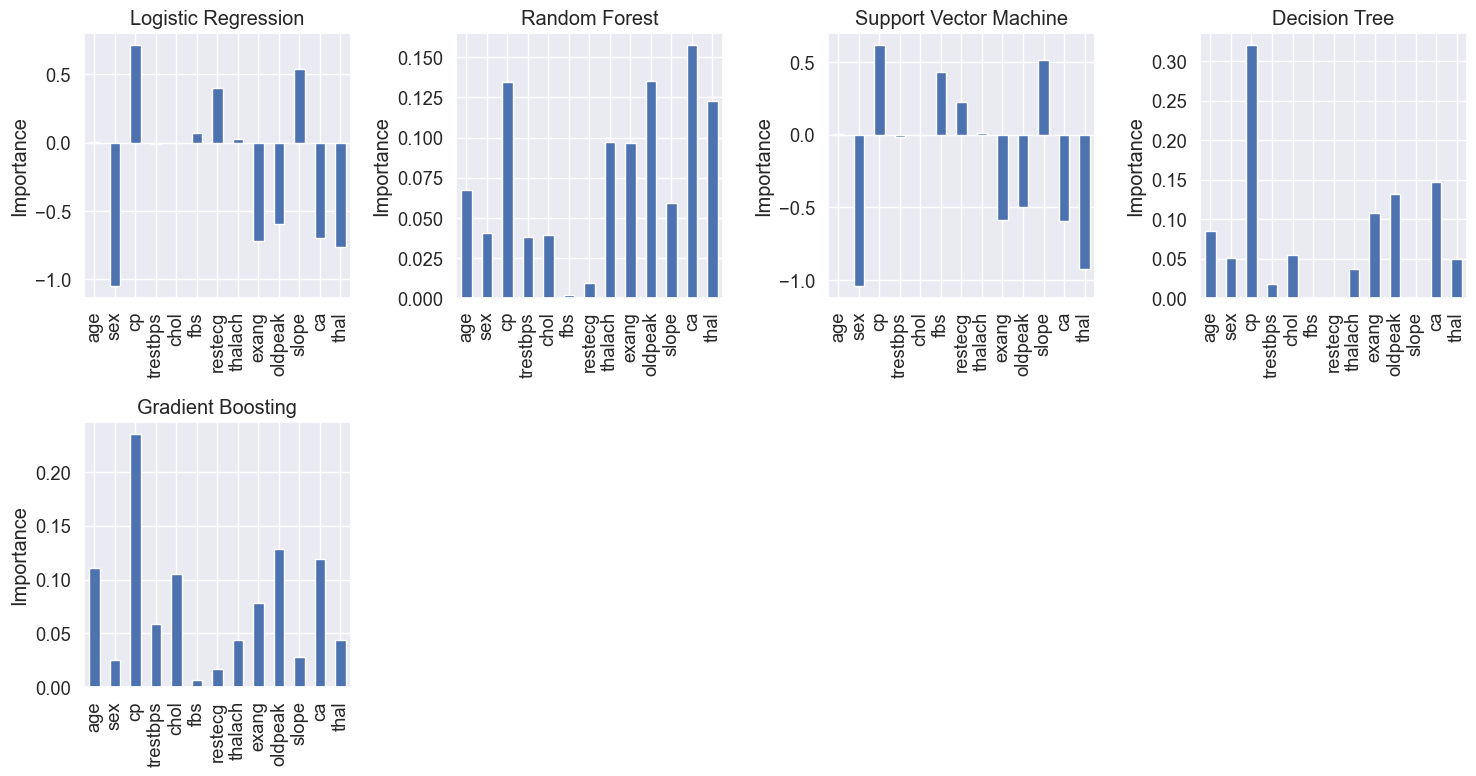

In [105]:
# Determine number of models with feature importance
num_models = len(valid_feature_importance)

# Set rows and columns dynamically
rows = (num_models // 4) + (num_models % 4 > 0)  # At most 4 per row
cols = min(4, num_models)  # Max 4 columns

# Set figure size and layout
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 4 * rows))
axes = axes.flatten()

# Plot feature importance for each model
for i, (name, values) in enumerate(valid_feature_importance.items()):
    feature_df[name].plot(kind="bar", ax=axes[i], title=name)
    axes[i].set_ylabel("Importance")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove extra subplots

plt.tight_layout()
plt.show()

  ## Why Do Some Models Lack Feature Importance?

Not all machine learning models provide feature importance. In our case, the following models do **not** have feature importance attributes:

- **K-Nearest Neighbors (KNN)**
- **Gaussian Naive Bayes**

### Reasons:

1. **K-Nearest Neighbors (KNN)**
   - KNN makes predictions based on the distance between data points rather than learned feature weights.
   - Since it does not create a decision boundary or coefficients, it lacks an inherent method to measure feature importance.

2. **Gaussian Naive Bayes**
   - Gaussian Naive Bayes assumes that all features are **independent** of each other.
   - Unlike models such as logistic regression or decision trees, it does **not** learn feature weights but instead calculates probabilities for each class.

As a result, only models like **Logistic Regression, Random Forest, Support Vector Machine, Decision Tree, and Gradient Boosting** provide feature importance.


  ## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?